This notebook is just for making plots for the manga SOM paper (fall 2020)

In [1]:
'''Load Model and libraries'''
import os
import matplotlib.pyplot as plt
import numpy as np
from keras import Model
from astropy.io import fits
from astropy.table import Table
from sklearn.preprocessing import StandardScaler, MinMaxScaler

from DESOM import DESOM
from helpers import desom_model as dm

X=np.load('X_test250k.npy')
#-------------------------------------------------- Paths -------------------------------------------------
root = os.getcwd()
#Model weights stored at
full_save_path='results/tmp/aug12_c/'
full_save_path='results/tmp/oct13_x/' #trained on 250k
#full_save_path='results/tmp/nov21_a/' #trained on 400k (15x15 SOM, z256)
saved_weights = os.path.join(root, full_save_path)

#Filenames
ae_path = os.path.join(saved_weights, 'ae_weights-epoch.h5')
model_path = os.path.join(saved_weights, 'DESOM_model_final.h5')

#---------------------------------------------- Model setup -------------------------------
#Load the DESOM model
som = dm.load_desom_trained((15,15), X.shape[1], ae_path, model_path,latent=256)
map_size = som.map_size


Using TensorFlow backend.


In [2]:
''' Autoencoder Architecture'''
#som.autoencoder.summary()


' Autoencoder Architecture'

In [ ]:
''' LR comparison plot. more out of interest. wasn't part of the process really.
0    1,2,3, 4,   5,  6,   7,                8,              9,                      10,
iter,T,L,Lr,Lsom,Lkm,Ltop,quantization_err,topographic_err,latent_quantization_err,latent_topographic_err'''

history64 =np.genfromtxt('results/tmp/aug12_c/desom_log.csv',delimiter=',')
#history32 =np.genfromtxt('results/tmp/oct9_a/desom_log.csv',delimiter=',')
history16 =np.genfromtxt('results/tmp/oct9_b/desom_log.csv',delimiter=',')
#history128=np.genfromtxt('results/tmp/oct9_c/desom_log.csv',delimiter=',')
history256=np.genfromtxt('results/tmp/oct9_d/desom_log.csv',delimiter=',')

'''
args
save_path: aug12_c
ae type: cnn1D
map size: [15, 15]
ae epochs: 0
som epochs: 10000 #SOM only
both epochs: 20000 # both som and AE (total number of epochs)
gamma: 0.0001
T: 15.0 -> 2.0
lr: 0.001
latent: 64
Train size: 175000
Shape before flattening : (284, 16)
'''

fig, ax = plt.subplots(1,1, figsize=(8,3))
#fig.suptitle('Varied Latent Width')
ax.set_title('AE Loss')
ax.semilogy(range(0,20001,100),history16[:,3])
#ax[0].plot(range(0,20001,100),history32[:,3])
ax.semilogy(range(0,20001,100),history64[:,3])
#ax[0].plot(range(0,20001,100),history128[:,3])
ax.semilogy(range(0,20001,100),history256[:,3])
ax.legend(['z = 16','z = 64','z = 256'],loc='upper right')
#ax[0].set_xlim(0,1000)
ax.set_ylabel('Mean Squared Error')
ax.set_xlabel('Epoch')


In [ ]:
''' Looking at whether latent width affects Quantization Error. (it doesn't)
0    1,2,3, 4,   5,  6,   7,                8,              9,                      10,
iter,T,L,Lr,Lsom,Lkm,Ltop,quantization_err,topographic_err,latent_quantization_err,latent_topographic_err'''

history64 =np.genfromtxt('results/tmp/aug12_c/desom_log.csv',delimiter=',')
history32 =np.genfromtxt('results/tmp/oct9_a/desom_log.csv',delimiter=',')
history16 =np.genfromtxt('results/tmp/oct9_b/desom_log.csv',delimiter=',')
history128=np.genfromtxt('results/tmp/oct9_c/desom_log.csv',delimiter=',')
history256=np.genfromtxt('results/tmp/oct9_d/desom_log.csv',delimiter=',')

fig, ax = plt.subplots(1,1, figsize=(8,3))
#fig.suptitle('Varied Latent Width')
ax.set_title('Quantization Error Varied Z')
ax.semilogy(range(0,20001,100),history16[:,7])
#ax[0].plot(range(0,20001,100),history32[:,3])
ax.semilogy(range(0,20001,100),history64[:,7])
#ax[0].plot(range(0,20001,100),history128[:,3])
ax.semilogy(range(0,20001,100),history256[:,7])
ax.legend(['z = 16','z = 64','z = 256'],loc='upper right')
#ax[0].set_xlim(0,1000)
ax.set_ylabel('Mean Squared Error')
ax.set_xlabel('Epoch')


history15=np.genfromtxt('results/tmp/aug12_c/desom_log.csv',delimiter=',')
#history20=np.genfromtxt('results/tmp/oct9_e/desom_log.csv',delimiter=',')
history25=np.genfromtxt('results/tmp/oct9_h/desom_log.csv',delimiter=',')
#history10=np.genfromtxt('results/tmp/oct9_f/desom_log.csv',delimiter=',')
history5=np.genfromtxt('results/tmp/oct9_g/desom_log.csv',delimiter=',')

fig, ax = plt.subplots(1,1, figsize=(8,3))
#fig.suptitle('Varied SOM Size')
ax.set_title('Quantization Error Varied SOM size')
ax.semilogy(range(0,20001,100),history5[:,7])
ax.semilogy(range(0,20001,100),history15[:,7])
#ax[0].semilogy(range(0,20001,100),history20[:,5])
ax.semilogy(range(0,20001,100),history25[:,7])
#ax[0].semilogy(range(0,20001,100),history10[:,5])
ax.legend(['5 x 5','15 x 15','25 x 25'],loc='upper right')
#ax.set_ylim(0,2000)
ax.set_ylabel('Mean Squared Error')
ax.set_xlabel('Epoch')

In [ ]:
''' Continuation of above'''
fig, ax = plt.subplots(1,1, figsize=(8,3))
#fig.suptitle('Varied Latent Width')
ax.set_title('SOM Loss')
ax.semilogy(range(0,20001,100),history16[:,4])
#ax[0].plot(range(0,20001,100),history32[:,3])
ax.semilogy(range(0,20001,100),history64[:,4])
#ax[0].plot(range(0,20001,100),history128[:,3])
ax.semilogy(range(0,20001,100),history256[:,4])
ax.legend(['z = 16','z = 64','z = 256'],loc='upper right')
#ax[0].set_xlim(0,1000)
ax.set_ylabel('Mean Squared Error')
ax.set_xlabel('Epoch')


In [ ]:
''' LR comparison plot. more out of interest. wasn't part of the process really.
0    1,2,3, 4,   5,  6,   7,                8,              9,                      10,
iter,T,L,Lr,Lsom,Lkm,Ltop,quantization_err,topographic_err,latent_quantization_err,latent_topographic_err'''

history15=np.genfromtxt('results/tmp/aug12_c/desom_log.csv',delimiter=',')
history20=np.genfromtxt('results/tmp/oct9_e/desom_log.csv',delimiter=',')
history25=np.genfromtxt('results/tmp/oct9_h/desom_log.csv',delimiter=',')
history10=np.genfromtxt('results/tmp/oct9_f/desom_log.csv',delimiter=',')
history5=np.genfromtxt('results/tmp/oct9_g/desom_log.csv',delimiter=',')

fig, ax = plt.subplots(1,1, figsize=(8,3))
#fig.suptitle('Varied SOM Size')
ax.set_title('SOM Loss.')
ax.semilogy(range(0,20001,100),history5[:,4])
ax.semilogy(range(0,20001,100),history15[:,4])
#ax[0].semilogy(range(0,20001,100),history20[:,5])
ax.semilogy(range(0,20001,100),history25[:,4])
#ax[0].semilogy(range(0,20001,100),history10[:,5])
ax.legend(['5 x 5','15 x 15','25 x 25'],loc='upper right')
#ax[0].set_xlim(0,1000)
ax.set_ylabel('Mean Squared Error')
ax.set_xlabel('Epoch')

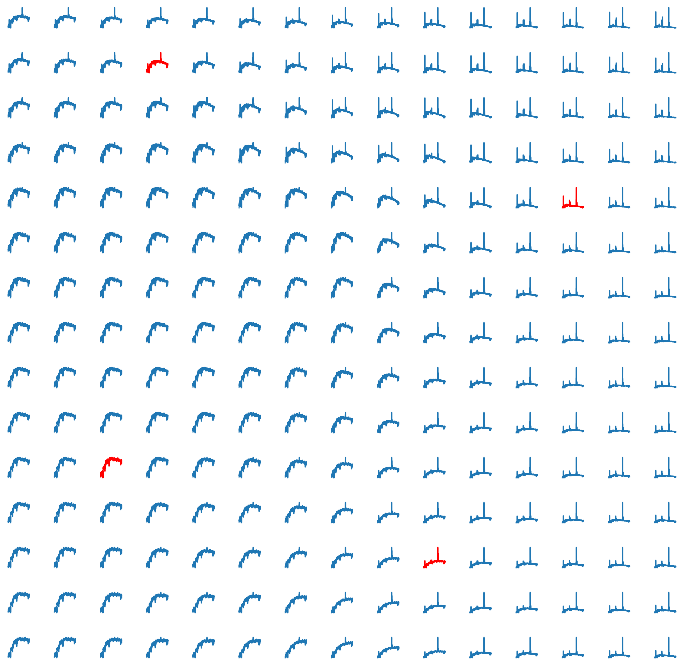

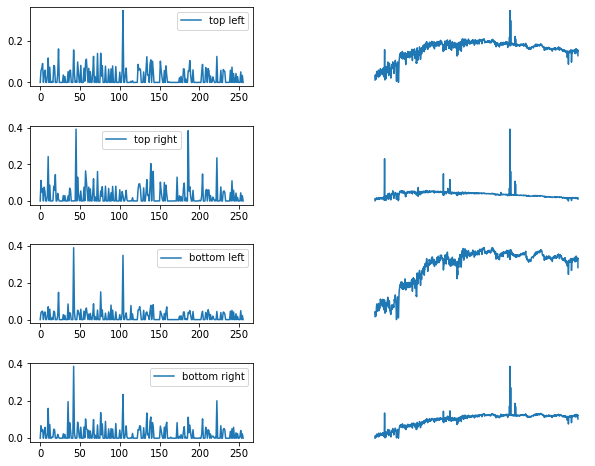

In [2]:
''' PLOT: Prototypes'''
map_size = som.map_size

examine=[18,72,152,189]
rough_loc=['top left','top right','bottom left','bottom right']

decoded_prototypes = som.decode(som.prototypes)
fig, ax = plt.subplots(map_size[0], map_size[1], figsize=(12,12))
#fig.suptitle('Decoded Prototypes')
#Iterate over each and every prototype
for k in range(map_size[0]*map_size[1]):
    x = decoded_prototypes[k]
    if k in examine:
        ax[k // map_size[1]][k % map_size[1]].plot(x,linewidth=1,c='red')
    else:
        ax[k // map_size[1]][k % map_size[1]].plot(x,linewidth=1)
    ax[k // map_size[1]][k % map_size[1]].axis('off')
plt.subplots_adjust(hspace=1, wspace=1)

fig,ax=plt.subplots(len(examine),2,figsize=(10,8))#,sharex=True)
for i in range(len(examine)):
    ax[i][1].plot(decoded_prototypes[examine[i]])
    ax[i][0].plot(som.prototypes[examine[i]])
    ax[i][0].legend([rough_loc[i]])
    ax[i][1].axis('off')
#    ax[]
plt.subplots_adjust(hspace=0.5, wspace=0.5)

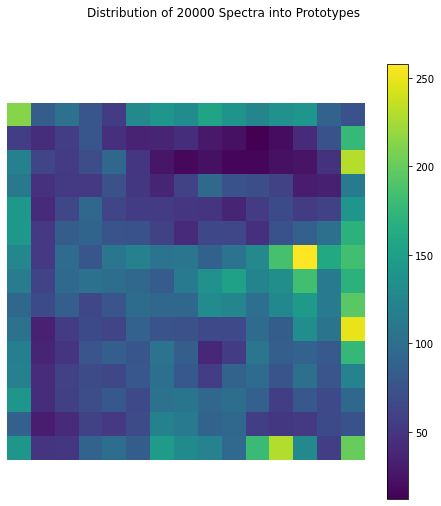

In [3]:
''' Map 20k test spectra to Nodes'''
''' PLOT: distribution of spectra on the map'''

#LOAD / SELECT SPECTRA
Xmin=X[:20000]
#Y_test=np.load('Y_test.npy')
Y_test=Table.read('Y_test400k.fits')
Ymin=Y_test[:20000]

# Bin each spectrum into the best node
best_node=np.zeros((Xmin.shape[0]))
dist_map = dm.get_distance_map(som, Xmin)
for i in range(Xmin.shape[0]): #for each spectrum
    temp_dist_map=dist_map[i].flatten() # map_size[0]*map_size[1]
    temp_min=temp_dist_map.min() # closest node
    best_node[i]=np.where(temp_dist_map == temp_min)[0] # bin closest node.
Ymin['bmu']=best_node

''' this is plotting the heightmap'''
heightmap=np.zeros(map_size[0]*map_size[1])
for bmu in range(map_size[0]*map_size[1]):
    masked=(Ymin['bmu']==bmu)
    heightmap[bmu]=len(Ymin[masked])

cmap='viridis'
my_plot=list()
fig, axs = plt.subplots(1, figsize=(8,8))
fig.suptitle('Distribution of 20000 Spectra into Prototypes')
my_plot.append(axs.imshow(heightmap.reshape(map_size),cmap=cmap))
axs.axis('off')
fig.colorbar(my_plot[0],ax=axs,orientation='vertical')


/home/finnarch/jupyter_py3/lib/python3.6/site-packages/astropy/table/column.py:991: RuntimeWarning: invalid value encountered in greater
  result = getattr(super(), op)(other)


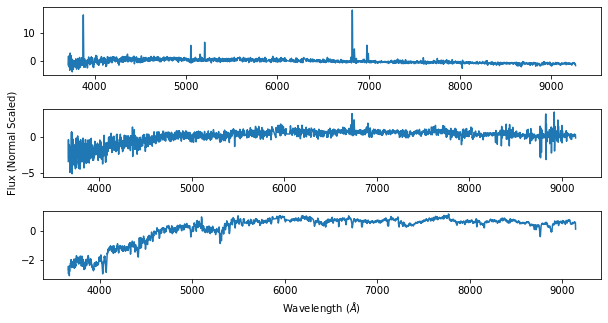

In [68]:
''' PLOT: Samples.'''

if True:
    temp_path='/project/rrg-jfncc/jwoo/astro/data/MANGA/manga/dr15/baxels/MLdata/'
    temp_spec=np.load(temp_path+'spec0.npy')
    temp_wave=np.load(temp_path+'wave0.npy')
    temp_spec=temp_spec[:1000]
    temp_wave=temp_wave[:1000]
    temp_spec=StandardScaler().fit_transform(temp_spec.T).T
    temp_data=Table.read(temp_path+'datatab0.fits')
    temp_data=temp_data[:1000]

if False:
    print(temp_data.colnames)
    print(temp_data['ML_r'].min())
    print(temp_data['ML_r'].max())
    print(np.nanmin(temp_data['BPTdist_Ka03']))
    print(np.nanmax(temp_data['BPTdist_Ka03']))

if True:
    fig,ax=plt.subplots(3,1,figsize=(10,5),sharex=False)
    
    mask=(temp_data['ML_r']<0.3)
    ax[0].plot(temp_wave[mask][0,:],temp_spec[mask][0,:]) #low MLr

    mask= (temp_data['ML_r']>2.0)
    mask2=(temp_data['ML_r']<2.5)
    mask3=mask*mask2
    ax[1].plot(temp_wave[mask3][0,:],temp_spec[mask3][0,:]) #medium MLr
    ax[1].set_ylabel('Flux (Normal Scaled)')

    mask=(temp_data['BPTdist_Ka03']>2.6)
    ax[2].plot(temp_wave[mask][0,:],temp_spec[mask][0,:]) #high BPT
    ax[2].set_xlabel(r'Wavelength ($\AA$)')

    plt.subplots_adjust(hspace=0.5, wspace=1.01)

Text(0.5, 0, 'Data Point Index')

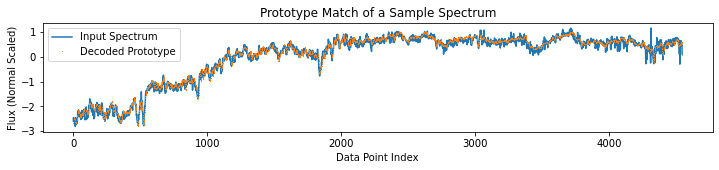

In [4]:
''' PLOT Input vs Decoded Prototype''' #maybe not so useful

decoded_prototypes = som.decode(som.prototypes)

som_prediction = som.predict(X[:20,:])
ae_prediction = som.autoencoder.predict(X[:20,:])
def Vis_Prototype_Match(index,fig_index):
    plt.figure(fig_index,figsize=(12,2))
    plt.plot(X[index,:])
    plt.plot(decoded_prototypes[som_prediction[index]],',')#,alpha=0.4)
    plt.legend(['Input Spectrum','Decoded Prototype'])

Vis_Prototype_Match(4,1) #this one is continuum # Vis_Prototype_Match(3,0) #this has emission lines
plt.title('Prototype Match of a Sample Spectrum')
plt.ylabel('Flux (Normal Scaled)')
plt.xlabel('Data Point Index')

/home/finnarch/jupyter_py3/lib/python3.6/site-packages/ipykernel_launcher.py:38: RuntimeWarning: Mean of empty slice


(-0.5, 255.5, 1.5, -0.5)

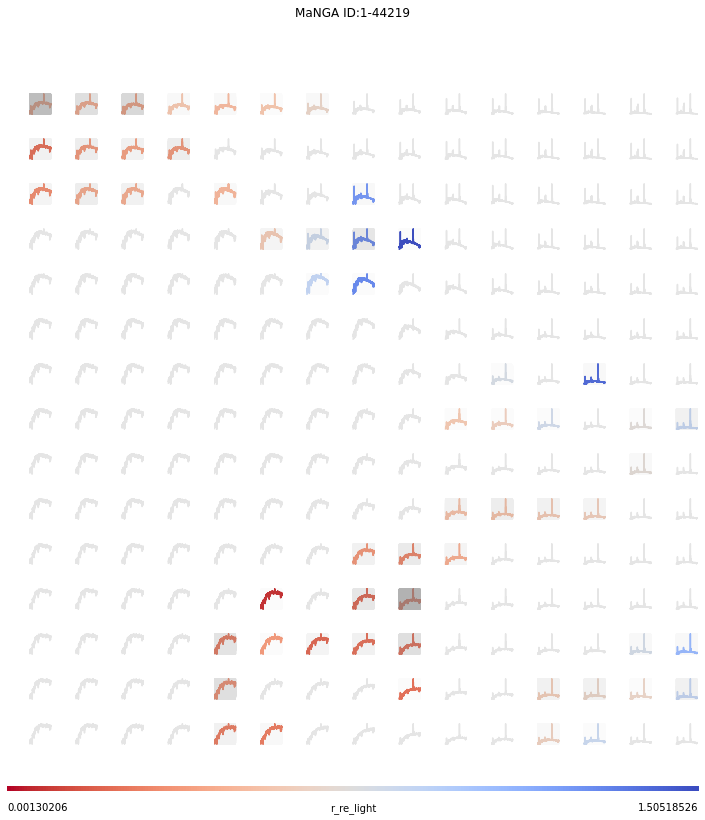

In [71]:
''' 15x15 plot of sample galaxy, coloured by re_light'''
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.cm as cm

gal_indexes=np.load('gal_unique_indexes.npy')
data_path='data/gal_split_100/'

pull=['redshift','meansn2','ebv_stars','ebv_gas','twelvelogoh','ML_r',
      'vel_stars', 'sig_stars','BPTdist_Ka03','BPTdist_Ke01','min_sn_bpt','min_sn_balmer',
      'logSFR_dens','logage','met','logMs_dens', 'r_re_mass','r_re_light',
      'objID']
attr='r_re_light'

index=413
test_gal=np.load(data_path+str(int(gal_indexes[index]))+'.npy')
test_gal=StandardScaler().fit_transform(test_gal.T).T
#
#Y_info=np.load(data_path+str(int(gal_indexes[index]))+'_info.npy')
Y_info=Table.read(data_path+str(int(gal_indexes[index]))+'_info.fits')

best_node=np.zeros((test_gal.shape[0]))
dist_map = dm.get_distance_map(som, test_gal)
for i in range(test_gal.shape[0]): #for each spectrum
    temp_dist_map=dist_map[i].flatten() # map_size[0]*map_size[1]
    temp_min=temp_dist_map.min() # closest node
    best_node[i]=np.where(temp_dist_map == temp_min)[0] # bin closest node.
Y_info['node']=best_node

heightmap=np.zeros(map_size[0]*map_size[1])

attr_av=np.zeros(map_size[0]*map_size[1])
for bmu in range(map_size[0]*map_size[1]):
    masked=(Y_info['node']==int(bmu))
    temp_list=Y_info[attr][masked] #<- just simplify this?
    finite_mask=(np.isfinite(temp_list))
    #
    attr_av[bmu]=np.nanmean(temp_list[finite_mask])
    heightmap[bmu]=len(Y_info[masked])    

scaled_alpha=MinMaxScaler().fit_transform(heightmap.reshape(-1,1)).flatten()
scaled_alpha=scaled_alpha*0.6

finite_mask=(np.isfinite(Y_info[attr]))
vmin=Y_info[attr][finite_mask].min()
vmax=Y_info[attr][finite_mask].max()

norm = mpl.colors.Normalize(vmin=vmin, vmax=vmax)
cmap = cm.coolwarm_r
#    cmap = cm.nipy_spectral_r
m = cm.ScalarMappable(norm=norm, cmap=cmap)

decoded_prototypes = som.decode(som.prototypes)
fig, ax = plt.subplots(map_size[0], map_size[1], figsize=(12,12))
fig.suptitle(str('MaNGA ID:'+Y_info['mangaID'][0]))#+'. samples:'+str(len(Y_info))))
my_cols=m.to_rgba(attr_av)
for k in range(map_size[0]*map_size[1]):
    x = decoded_prototypes[k]
    background = (decoded_prototypes[k].max()-decoded_prototypes[k].min())*np.random.random_sample(4544)+decoded_prototypes[k].min()
    ax[k // map_size[1]][k % map_size[1]].plot(x,c=my_cols[k])
    if sum(my_cols[k])==0.: ax[k // map_size[1]][k % map_size[1]].plot(x,c='grey',alpha=0.2)
    ax[k // map_size[1]][k % map_size[1]].plot(background,alpha=scaled_alpha[k],c='grey')
    ax[k // map_size[1]][k % map_size[1]].axis('off')
#    ax[k // map_size[1]][k % map_size[1]].plot(background,alpha=0.015,c='black')
plt.subplots_adjust(hspace=1.01, wspace=1.01)

# 'colorbar'
gradient=(np.linspace(vmin,vmax,256))
gradient = np.vstack((gradient, gradient))
#
caxleft=plt.axes([0.1,0.05,0,0])
caxleft.text(0,0,str(round(vmin,8)))
caxleft.axis('off')
#
caxright=plt.axes([0.9,0.05,0,0])
caxright.text(0,0,str(round(vmax,8)),horizontalalignment='right')
caxright.axis('off')

caxcent=plt.axes([0.5,0.05,0,0])
caxcent.text(0,0,str(attr),horizontalalignment='center')
caxcent.axis('off')    
# left,bottom,weight,height
cax1=plt.axes([0.1,0.05,0.8,0.05])
cax1.imshow(gradient, cmap=cmap)
cax1.axis('off')
#

In [ ]:
''' search manga object by suffix'''
gal_indexes=np.load('gal_unique_indexes.npy')
np.where(gal_indexes == 178828)[0][0] #1566
np.where(gal_indexes == 44219)[0][0] #413

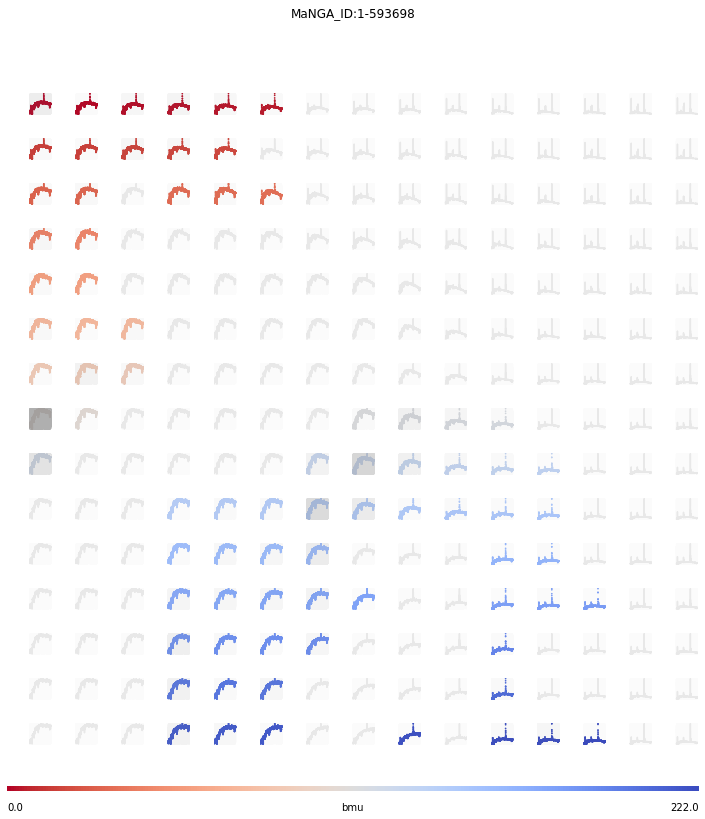

In [80]:
''' similar to above. dotwise colouring to capture different values within a prototype '''

gal_indexes=np.load('gal_unique_indexes.npy')
data_path='data/gal_split_100/'
fingerprint_dims=map_size[0]*map_size[1] #??

ATTR='bmu'

def get_distance_map(desom, X):
    y_pred = desom.predict(X)
    return desom.map_dist(y_pred)

for i in range(1):
    index=4323
    test_gal=np.load(data_path+str(int(gal_indexes[index]))+'.npy') #load spectra
    test_gal=StandardScaler().fit_transform(test_gal.T).T #normalize spectra
    #
    Y_info=Table.read(data_path+str(int(gal_indexes[index]))+'_info.fits') #load data
    #----------------- FIX OR ADD DATA -------------------------
    ''' add BMU '''
    best_node=np.zeros((test_gal.shape[0]))
    dist_map = get_distance_map(som, test_gal)
    for i in range(test_gal.shape[0]): #for each spectrum
        temp_dist_map=dist_map[i].flatten() # map_size[0]*map_size[1]
        temp_min=temp_dist_map.min() # closest node
        best_node[i]=np.where(temp_dist_map == temp_min)[0] # bin closest node.
    Y_info['bmu']=best_node
    
    '''The suffix of the mangaID. (used for filing)''' #not so useful here.
    r=np.array(Y_info['mangaID'],dtype='str')
    r2=np.zeros(len(r),dtype='int')
    for i in range(len(r)):
        r2[i]=int(r[i].split('-')[1])
    Y_info['suffix']=r2    

    ''' logify ML_r'''
    Y_info['logML_r']=np.log(Y_info['ML_r'])
    
    ''' fix MS_dens, add sSFR'''
    from astropy.cosmology import FlatLambdaCDM
    cosmod = FlatLambdaCDM(name='Concordance',H0=70.0,Om0=0.3,Tcmb0=2.725, Neff=3.04, Ob0=0.0463)
    pixscale = 0.000138889*3600. # arcsec (seems to be same for all cubes)
    pixscale = pixscale/3600.*np.pi/180. # radians
    comd_bax = cosmod.comoving_distance(Y_info['redshift']).value*1.0e3 #comoving dist in kpc
    spaxsize_bax = pixscale*comd_bax/(1.0 + Y_info['redshift']) # kpc
    spaxsize_bax = spaxsize_bax**2. # kpc^2
    Y_info['logMS_dens_kpc'] = Y_info['logMs_dens'] - np.log10(spaxsize_bax)  # solar mass per kpc^2
    Y_info['sSFR']=Y_info['logSFR_dens']-Y_info['logMS_dens_kpc']
    #-----------------------------------------------------    

    heightmap=np.zeros(map_size[0]*map_size[1])
    
    #prep colours
    finite_mask=(np.isfinite(Y_info[ATTR]))
    vmin=Y_info[ATTR][finite_mask].min()
    vmax=Y_info[ATTR][finite_mask].max()
    norm = mpl.colors.Normalize(vmin=vmin, vmax=vmax)
    cmap = cm.coolwarm_r
    m = cm.ScalarMappable(norm=norm, cmap=cmap)
    
#    attr_av=np.zeros(fingerprint_dims) #get colours
    colours=np.zeros((fingerprint_dims,test_gal.shape[1],4))
    for bmu in range(map_size[0]*map_size[1]):
        masked=(Y_info['bmu']==int(bmu))
        temp_list=Y_info[ATTR][masked]
        temp_list.sort()
        for i in range(len(temp_list)):
            temp_spacing=int(4544/(len(temp_list)))
            colours[bmu,temp_spacing*i:temp_spacing*i+temp_spacing]=m.to_rgba(temp_list[i])
        heightmap[bmu]=len(Y_info[masked])
    
    # heightmap normalized for background colouring
    scaled_alpha=MinMaxScaler().fit_transform(heightmap.reshape(-1,1)).flatten()
    scaled_alpha=scaled_alpha*0.6
    
    # start the plotting
    fig, ax = plt.subplots(map_size[0], map_size[1], figsize=(12,12))
    fig.suptitle(str('MaNGA_ID:'+ Y_info['mangaID'][0]))
    #
    decoded_prototypes = som.decode(som.prototypes) #decoded_prototypes are used in each cell
    for k in range(map_size[0]*map_size[1]):
        # select prototype:
        x = decoded_prototypes[k]
        # create scatter for activated nodes, coloured by sorted values:
        ax[k // map_size[1]][k % map_size[1]].scatter(range(4544),x,c=colours[k,:,:],cmap=cmap,s=0.5)
        # if no activation, create ghost prototype:
        if sum(colours[k,0,:])==0.: ax[k // map_size[1]][k % map_size[1]].plot(x,c='grey',alpha=0.15)
        # background for heightmap info:
        background = (decoded_prototypes[k].max()-decoded_prototypes[k].min())*np.random.random_sample(4544)+decoded_prototypes[k].min()
        ax[k // map_size[1]][k % map_size[1]].plot(background,alpha=scaled_alpha[k],c='grey') #background for activated
        ax[k // map_size[1]][k % map_size[1]].plot(background,alpha=0.015,c='black') #floor value of backgrounds
        ax[k // map_size[1]][k % map_size[1]].axis('off')
    plt.subplots_adjust(hspace=1.01, wspace=1.01)

    # 'colorbar'
    gradient=(np.linspace(vmin,vmax,256))
    gradient = np.vstack((gradient, gradient))
    #
    caxleft=plt.axes([0.1,0.05,0,0])
    caxleft.text(0,0,str(round(vmin,8)))
    caxleft.axis('off')
    #
    caxright=plt.axes([0.9,0.05,0,0])
    caxright.text(0,0,str(round(vmax,8)),horizontalalignment='right')
    caxright.axis('off')
    #
    caxcent=plt.axes([0.5,0.05,0,0])
    caxcent.text(0,0,str(ATTR),horizontalalignment='center')
    caxcent.axis('off')    
    # left,bottom,weight,height
    cax1=plt.axes([0.1,0.05,0.8,0.05])
    cax1.imshow(gradient, cmap=cmap)
    cax1.axis('off')
            

Text(0.5, 1.0, 'Distribution of Spectra in MaNGA Objects')

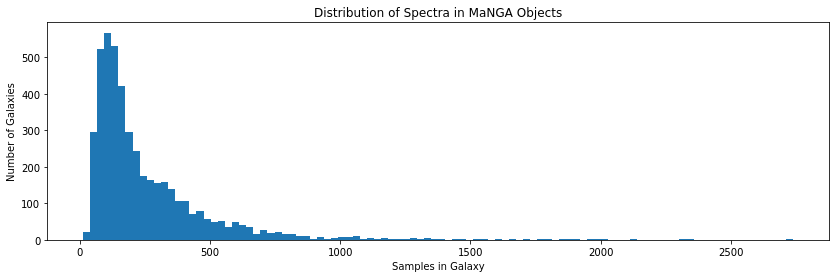

In [2]:
''' How many spectra are found in galaxies'''
''' put this WAY later, if at all. maybe part of Jo's section '''
import numpy as np
import matplotlib.pyplot as plt


f=np.load('Fingerprints/aug12_c_galaxies.npy') #doesn't matter which fingerprints
plt.figure(0,figsize=(14,4))
g=f.sum(axis=1)

plt.hist(g,bins=100)
plt.xlabel('Samples in Galaxy')
plt.ylabel('Number of Galaxies')
plt.title('Distribution of Spectra in MaNGA Objects')

In [13]:
''' Latent quality check'''
import os
import matplotlib.pyplot as plt
import numpy as np
from keras import Model
from astropy.io import fits
from astropy.table import Table
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import mean_squared_error
import time

from DESOM import DESOM
from helpers import desom_model as dm

X=np.load('X_test.npy')
Xmin=X[:10000] #using the 
map_size = (15,15)

def load_model(path,latent):
    root = os.getcwd()
    #Model weights stored at
    full_save_path='results/tmp/'+path+'/'
    saved_weights = os.path.join(root, full_save_path)
    ae_path = os.path.join(saved_weights, 'ae_weights-epoch.h5')
    model_path = os.path.join(saved_weights, 'DESOM_model_final.h5')
    som = dm.load_desom_trained((15,15), 'cnn1D', X.shape[1], ae_path, model_path,latent=latent)
    return som

paths=[#'oct13_a','oct13_b','oct13_c','oct13_d','oct13_e','oct13_f','oct13_g','oct13_h',
      #'oct13_i','oct13_j','oct13_k','oct13_l','oct13_m','oct13_n','oct13_o','oct13_p',
      #'oct13_q','oct13_r','oct13_s','oct13_t','oct13_v','oct13_u','oct13_w','oct13_x','oct13_y',
      'oct17_a','oct17_b','oct17_c','oct17_d','oct17_e']
latents=[16,32,64,128,256,512]
latents=[512]


''' this takes ~12 minutes'''
start=time.time()
temp=list()
for i in range(len(paths)):
    temp_model=load_model(paths[i],latent=latents[int(i/5)])
    temp_pred=temp_model.autoencoder.predict(Xmin)
    temp.append(mean_squared_error(Xmin,temp_pred))
    if i==0: print(time.time()-start)
temp=np.array(temp)
print(time.time()-start)

'''
temp=array([0.08760447, 0.08635269, 0.0850031 , 0.08247575, 0.08285465, #This is AE MSE values. Used below
       0.0787889 , 0.0792414 , 0.07876273, 0.07973711, 0.0784244 ,
       0.07501319, 0.07424388, 0.07534754, 0.07609916, 0.07466601,
       0.07371062, 0.07289662, 0.07187696, 0.0723949 , 0.0735688 ,
       0.07138509, 0.07145062, 0.07136041, 0.07081169, 0.07114677,
       0.06982009, 0.06984423, 0.06929046, 0.06933381, 0.06969914])'''
    

33.21247720718384
163.5527844429016


'\ntemp=array([0.08760447, 0.08635269, 0.0850031 , 0.08247575, 0.08285465, #This is AE MSE values. Used below\n       0.0787889 , 0.0792414 , 0.07876273, 0.07973711, 0.0784244 ,\n       0.07501319, 0.07424388, 0.07534754, 0.07609916, 0.07466601,\n       0.07371062, 0.07289662, 0.07187696, 0.0723949 , 0.0735688 ,\n       0.07138509, 0.07145062, 0.07136041, 0.07081169, 0.07114677])'

In [16]:
temp=np.array([0.08760447, 0.08635269, 0.0850031 , 0.08247575, 0.08285465, #This is AE MSE values. Used below
       0.0787889 , 0.0792414 , 0.07876273, 0.07973711, 0.0784244 ,
       0.07501319, 0.07424388, 0.07534754, 0.07609916, 0.07466601,
       0.07371062, 0.07289662, 0.07187696, 0.0723949 , 0.0735688 ,
       0.07138509, 0.07145062, 0.07136041, 0.07081169, 0.07114677,
       0.06982009, 0.06984423, 0.06929046, 0.06933381, 0.06969914])

Text(0.5, 1.0, 'AE loss, varied Z')

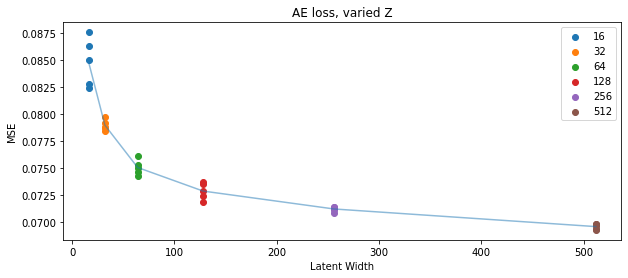

In [19]:
latents=[16,32,64,128,256,512]
temp_shaped=temp.reshape(6,5)

plt.figure(1,figsize=(10,4))
for i in range(6):
    plt.scatter([latents[i]]*5,temp_shaped[i,:])
plt.legend(latents)
plt.plot(latents,np.average(temp_shaped.T,axis=0),alpha=0.5)
plt.ylabel('MSE')
plt.xlabel('Latent Width')
plt.title('AE loss, varied Z')

In [2]:
''' SOM MSE? '''
paths=['oct13_a','oct13_b','oct13_c','oct13_d','oct13_e','oct13_f','oct13_g','oct13_h',
      'oct13_i','oct13_j','oct13_k','oct13_l','oct13_m','oct13_n','oct13_o','oct13_p',
      'oct13_q','oct13_r','oct13_s','oct13_t','oct13_v','oct13_u','oct13_w','oct13_x','oct13_y']
#paths=['oct17_a','oct17_b','oct17_c','oct17_d','oct17_e'] #these were z=512 models
latents=[16,32,64,128,256]

#quick_paths=['oct13_a','oct13_f','oct13_k','oct13_p','oct13_v']
Xmin=X[:10000]
start=time.time()
temp=list()
for i in range(len(paths)):
    temp_model=load_model(paths[i],latent=latents[int(i/5)])
    temp_dec_prototypes=temp_model.decode(temp_model.prototypes)
    temp_pred=temp_model.predict(Xmin) #best node
    protos_10k=np.zeros((10000,4544))
    for k in range(10000):
        protos_10k[k]=temp_dec_prototypes[temp_pred[k]]
    temp.append(mean_squared_error(Xmin,protos_10k))
    if i==0: print(time.time()-start) #41 seconds
temp=np.array(temp)
print(time.time()-start) #1103 seconds (18 minutes)

'''temp=array([0.00363111, 0.00446108, 0.00383474, 0.00536687, 0.00438325, #SOM MSE calculated at encoded layer
       0.00315048, 0.00265733, 0.00283003, 0.00246335, 0.00284881,
       0.00161733, 0.00170135, 0.00177687, 0.00164749, 0.00180987,
       0.00102031, 0.00085842, 0.00096822, 0.00093694, 0.00099997,
       0.00051988, 0.00055528, 0.00051636, 0.00049475, 0.00051739])'''

# what this does is:
# load the model
# predict the 10k best nodes for the test set
# encode the test set
# MSE encoded values vs prototypes
# results: very similar to AE loss, with z=128 better than z=64. Guess I'm checking prototypes at 128.
# results: i was really expecting this to get worse as latent increased


34.24133515357971
169.1772277355194


'temp=array([0.00363111, 0.00446108, 0.00383474, 0.00536687, 0.00438325,\n       0.00315048, 0.00265733, 0.00283003, 0.00246335, 0.00284881,\n       0.00161733, 0.00170135, 0.00177687, 0.00164749, 0.00180987,\n       0.00102031, 0.00085842, 0.00096822, 0.00093694, 0.00099997,\n       0.00051988, 0.00055528, 0.00051636, 0.00049475, 0.00051739])'

Text(0.5, 1.0, 'SOM, varied Z (calculated at full width)')

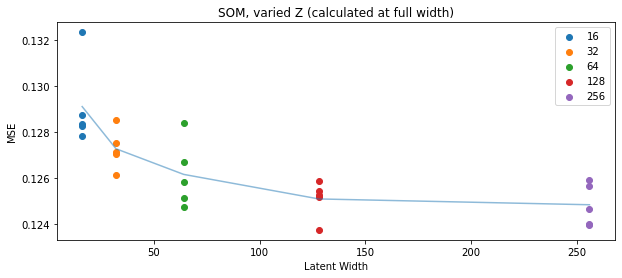

In [23]:
temp_shaped=temp.reshape(5,5)

plt.figure(1,figsize=(10,4))
for i in range(5):
    plt.scatter([latents[i]]*5,temp_shaped[i,:])
plt.legend(latents)
plt.plot(latents,np.average(temp_shaped.T,axis=0),alpha=0.5)
plt.ylabel('MSE')
plt.xlabel('Latent Width')
plt.title('SOM, varied Z (calculated at full width)')

Text(0.5, 1.0, 'SOM, varied Z (calculated at latent width)')

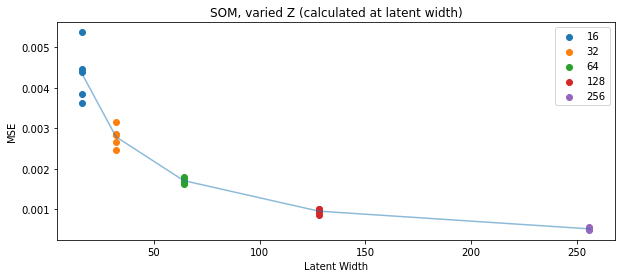

In [14]:
temp=np.array([0.00363111, 0.00446108, 0.00383474, 0.00536687, 0.00438325,
       0.00315048, 0.00265733, 0.00283003, 0.00246335, 0.00284881,
       0.00161733, 0.00170135, 0.00177687, 0.00164749, 0.00180987,
       0.00102031, 0.00085842, 0.00096822, 0.00093694, 0.00099997,
       0.00051988, 0.00055528, 0.00051636, 0.00049475, 0.00051739])
temp_shaped=temp.reshape(5,5)

plt.figure(1,figsize=(10,4))
for i in range(5):
    plt.scatter([latents[i]]*5,temp_shaped[i,:])
plt.legend(latents)
plt.plot(latents,np.average(temp_shaped.T,axis=0),alpha=0.5)
plt.ylabel('MSE')
plt.xlabel('Latent Width')
plt.title('SOM, varied Z (calculated at latent width)')

Text(0.5, 1.0, 'Prototype Return (higher is better)')

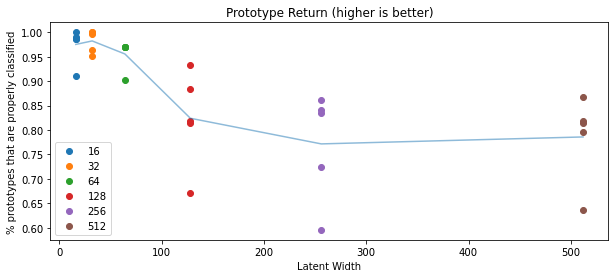

In [17]:
''' This is too weird a metric. Not used'''
rtp=np.array([205,222,223,225,222,
     214,225,224,217,225,
     218,203,218,218,218,
     151,199,183,210,184,
     134,163,188,189,194,
     183,179,184,143,195])
latents=[16,32,64,128,256,512]

rtp=rtp/225.

rtp_shaped=rtp.reshape(6,5)

plt.figure(1,figsize=(10,4))
for i in range(6): #for each latent space
    plt.scatter([latents[i]]*5,rtp_shaped[i,:])
plt.legend(latents)
plt.plot(latents,np.average(rtp_shaped,axis=1),alpha=0.5)
plt.ylabel('% prototypes that are properly classified')
plt.xlabel('Latent Width')
plt.title('Prototype Return (higher is better)')

In [2]:
''' Latent quality check'''
import os
import matplotlib.pyplot as plt
import numpy as np
from keras import Model
from astropy.io import fits
from astropy.table import Table
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import mean_squared_error
import time

from DESOM import DESOM
from helpers import desom_model as dm
import metrics

X=np.load('X_test.npy')
Xmin=X[:10000] #using the 
map_size = (15,15)

def load_model(path,latent):
    root = os.getcwd()
    #Model weights stored at
    full_save_path='results/tmp/'+path+'/'
    saved_weights = os.path.join(root, full_save_path)
    ae_path = os.path.join(saved_weights, 'ae_weights-epoch.h5')
    model_path = os.path.join(saved_weights, 'DESOM_model_final.h5')
    som = dm.load_desom_trained((15,15), 'cnn1D', X.shape[1], ae_path, model_path,latent=latent)
    return som

paths=['oct13_a','oct13_b','oct13_c','oct13_d','oct13_e',
       'oct13_f','oct13_g','oct13_h','oct13_i','oct13_j',
       'oct13_k','oct13_l','oct13_m','oct13_n','oct13_o',
       'oct13_p','oct13_q','oct13_r','oct13_s','oct13_t',
       'oct13_v','oct13_u','oct13_w','oct13_x','oct13_y',
       'oct17_a','oct17_b','oct17_c','oct17_d','oct17_e'
      ]
latents=[16,32,64,128,256,512]

Xmin=X[:10000]
start=time.time()
temp=list()
for i in range(len(paths)):
    temp_model=load_model(paths[i],latent=latents[int(i/5)])
    dist_map = dm.get_distance_map(temp_model, Xmin[:10000])

    temp.append(metrics.topographic_error(dist_map,(15,15)))
    if i==0: print(time.time()-start) #41 seconds
temp=np.array(temp)
print(time.time()-start) #1103 seconds (18 minutes)


32.06392049789429
908.602293252945


'\nCalculate SOM topographic error (internal DESOM function)\nTopographic error is the ratio of data points for which the two best matching units are not neighbors on the map.\n'

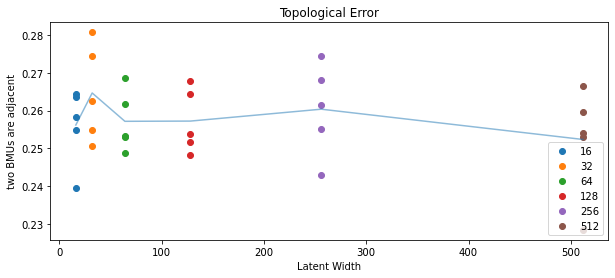

In [5]:
"""
Unused
Calculate SOM topographic error (internal DESOM function)
Topographic error is the ratio of data points for which the two best matching units are not neighbors on the map.
"""
temp_shaped=temp.reshape(6,5)

plt.figure(1,figsize=(10,4))
for i in range(6): #for each latent space
    plt.scatter([latents[i]]*5,temp_shaped[i,:])
plt.legend(latents)
plt.plot(latents,np.average(temp_shaped,axis=1),alpha=0.5)
plt.ylabel('two BMUs are adjacent')
plt.xlabel('Latent Width')
plt.title('Topological Error')

In [54]:
''' SOM1 parameters'''

'''Load Model and libraries'''
import os
import matplotlib.pyplot as plt
import numpy as np
from keras import Model
from astropy.io import fits
from astropy.table import Table
from sklearn.preprocessing import StandardScaler, MinMaxScaler

from DESOM import DESOM
from helpers import desom_model as dm

X=np.load('X_test250k.npy')
#-------------------------------------------------- Paths -------------------------------------------------
root = os.getcwd()
#Model weights stored at
#full_save_path='results/tmp/aug12_c/'
full_save_path='results/tmp/oct13_x/'
#full_save_path='results/tmp/nov12_a/'
saved_weights = os.path.join(root, full_save_path)

#Filenames
ae_path = os.path.join(saved_weights, 'ae_weights-epoch.h5')
model_path = os.path.join(saved_weights, 'DESOM_model_final.h5')

#---------------------------------------------- Model setup -------------------------------
#Load the DESOM model
som = dm.load_desom_trained((15,15), X.shape[1], ae_path, model_path,latent=256)
map_size = som.map_size



In [55]:
#LOAD / SELECT SPECTRA
Xmin=X[:20000]
#Y_test=np.load('Y_test.npy')
Y_test=Table.read('Y_test250k.fits')
Ymin=Y_test[:20000]

'''Bin each spectrum into the best node'''
best_node=np.zeros((Xmin.shape[0]))
dist_map = dm.get_distance_map(som, Xmin)
for i in range(Xmin.shape[0]): #for each spectrum
    temp_dist_map=dist_map[i].flatten() # map_size[0]*map_size[1]
    temp_min=temp_dist_map.min() # closest node
    best_node[i]=np.where(temp_dist_map == temp_min)[0] # bin closest node.
Ymin['bmu']=best_node

'''The suffix of the mangaID'''
r=np.array(Ymin['mangaID'],dtype='str')
r2=np.zeros(len(r),dtype='int')
for i in range(len(r)):
    r2[i]=int(r[i].split('-')[1])
Ymin['suffix']=r2    

''' Adds sSFR and logMS_dens_kpc to info'''
from astropy.cosmology import FlatLambdaCDM
cosmod = FlatLambdaCDM(name='Concordance',H0=70.0,Om0=0.3,Tcmb0=2.725, Neff=3.04, Ob0=0.0463)
#
pixscale = 0.000138889*3600. # arcsec (seems to be same for all cubes)
pixscale = pixscale/3600.*np.pi/180. # radians
comd_bax = cosmod.comoving_distance(Ymin['redshift']).value*1.0e3 #comoving dist in kpc
spaxsize_bax = pixscale*comd_bax/(1.0 + Ymin['redshift']) # kpc
spaxsize_bax = spaxsize_bax**2. # kpc^2
#
logMs_dens_kpc = Ymin['logMs_dens'] - np.log10(spaxsize_bax)  # solar mass per kpc^2
#
Ymin['logMS_dens_kpc']=logMs_dens_kpc
Ymin['sSFR']=Ymin['logSFR_dens']-Ymin['logMS_dens_kpc']

#take log of ML_r
Ymin['logML_r']=np.log(Ymin['ML_r'])

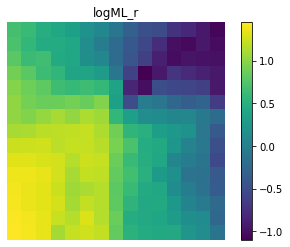

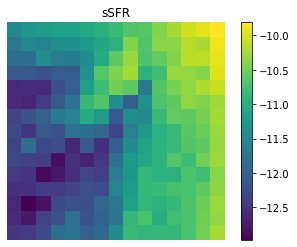

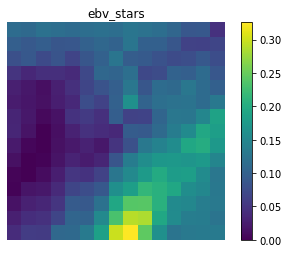

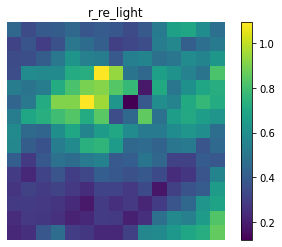

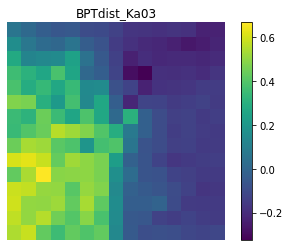

In [56]:
''' distribution of parameters in SOM2'''
ATTR=['logML_r','sSFR','ebv_stars','r_re_light','BPTdist_Ka03']

# select all spectra in that node
for m in range(len(ATTR)):
    temp_param=np.zeros(som.map_size[0]*som.map_size[1])
    for i in range(som.map_size[0]*som.map_size[1]):
        mask=(Ymin['bmu']==i)
        temp_param[i]=np.nanmedian(Ymin[ATTR[m]][mask])
    plt.figure(m)
    plt.imshow(temp_param.reshape(som.map_size))
    plt.title(ATTR[m])
    plt.axis('off')
    plt.colorbar()


In [ ]:
''' distribution of parameters in SOM2'''
# Not so helpful without colorbars on each. Plotted separately in cell above.

ATTR=['ML_r','sSFR','ebv_stars','BPTdist_Ka03']

fig,ax=plt.subplots(2,2,figsize=(10,10))

# average spectra in galaxies, then average galaxies
for m in range(len(ATTR)):
    temp_param2=np.zeros(som.map_size[0]*som.map_size[1])
    for i in range(som.map_size[0]*som.map_size[1]):
        mask=(Ymin['bmu']==i)
        temp_param[i]=np.nanmedian(Ymin[ATTR[m]][mask])
    ax[m//2][m%2].imshow(temp_param.reshape(som.map_size))
    ax[m//2][m%2].set_title(ATTR[m])
    ax[m//2][m%2].axis('off')
    

In [ ]:
'''horizontals'''
temp_weights=np.zeros((15,14))
for k in range(15):
    for i in range(14):
        temp_weights[k,i]=mean_squared_error(temp_model.prototypes[i+15*k],temp_model.prototypes[i+1+15*k])

if False:
    plt.figure(1)
    for i in range(15):
        plt.scatter(range(14),[i]*14,c=temp_weights.flatten()[i*14:i*14+14])
    plt.colorbar()

''' verticals'''
temp_weights_v=np.zeros((14,15))
for k in range(14):
    for i in range(15):
        node_0=temp_model.prototypes[i+15*k]
        node_1=temp_model.prototypes[i+15+15*k]
        temp_weights_v[k,i]=mean_squared_error(node_0,node_1)

if False:
    plt.figure(2)
    for i in range(14):
        plt.scatter(range(15),[i]*15,c=temp_weights_v.flatten()[i*15:i*15+15])
    plt.colorbar()

'''merged'''
plt.figure(3,figsize=(8,6))
for i in range(15):
    plt.scatter(range(14),[i]*14,c=temp_weights.flatten()[i*14:i*14+14])
for i in range(14):
    plt.scatter(np.arange(15)-0.5,np.array([i]*15)+0.5,c=temp_weights_v.flatten()[i*15:i*15+15])
plt.colorbar()
plt.title('MSE adjacent prototypes')

In [ ]:
''' now here is the fun problem of generalizing this '''

def weightmap_MSE(input_model):
    #this assumes it's square
    ims=input_model.map_size[0]
    temp_weights_h=np.zeros((ims,ims-1))
    for k in range(ims):
        for i in range(ims-1):
            temp_weights_h[k,i]=mean_squared_error(input_model.prototypes[i+ims*k],input_model.prototypes[i+1+ims*k])
    temp_weights_v=np.zeros((ims-1,ims))
    for k in range(ims-1):
        for i in range(ims):
            node_0=input_model.prototypes[i+ims*k]
            node_1=input_model.prototypes[i+ims+ims*k]
            temp_weights_v[k,i]=mean_squared_error(node_0,node_1)
    return temp_weights_h, temp_weights_v
    
def plt_weightmap(horizonal_connections,vertical_connectsion,ims):
    plt.figure(3,figsize=(8,6))
    for i in range(ims):
        plt.scatter(range(ims-1),[i]*(ims-1),c=horizonal_connections.flatten()[i*(ims-1):i*(ims-1)+(ims-1)])
    for i in range(ims-1):
        plt.scatter(np.arange(ims)-0.5,np.array([i]*ims)+0.5,c=vertical_connectsion.flatten()[i*ims:i*ims+ims])
    plt.colorbar()
    plt.title('MSE comparing neighbouring nodes, higher is more disconnected')

temp_model2=load_model(paths[15],latent=128)#latents[int(0/5)])

myx,myy=weightmap_MSE(temp_model2)
plt_weightmap(myx,myy,ims=15)

plt.figure(5)
decoded_prototypes = temp_model2.decode(temp_model2.prototypes)
fig, ax = plt.subplots(map_size[0], map_size[1], figsize=(16,16))
for k in range(map_size[0] * map_size[1]):
    x = decoded_prototypes[k]
    ax[k // map_size[1]][k % map_size[1]].plot(x)
    ax[k // map_size[1]][k % map_size[1]].axis('off')
plt.subplots_adjust(hspace=1.05, wspace=1.05)


(20000, 4544)
8.178328517998035e-05


Text(0.5, 1.0, 'average residual error for each spectra in test set')

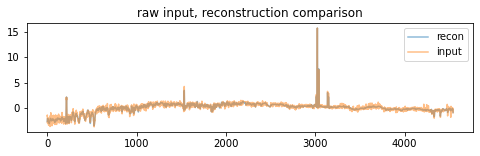

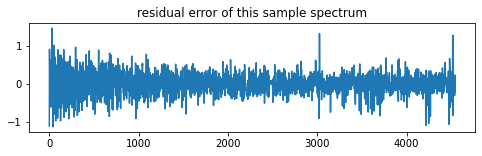

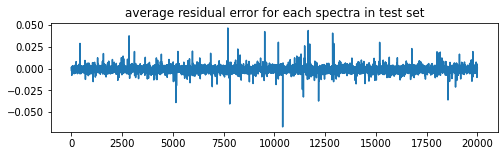

In [57]:
''' residual reconstruction error '''
recons=som.autoencoder.predict(Xmin)
index=5

plt.figure(0,figsize=(8,2))
plt.plot(recons[index],alpha=0.5)
plt.plot(Xmin[index],alpha=0.5)
plt.legend(['recon','input'])
plt.title('raw input, reconstruction comparison')

delta=recons-Xmin #<<<<<<<<<<< REQUIRED FOR FURTHER CELLS
print(delta.shape)
plt.figure(1,figsize=(8,2))
plt.plot(delta[index])
print(np.average(delta[index]))
plt.title('residual error of this sample spectrum')

plt.figure(2,figsize=(8,2))
plt.plot(np.average(delta,axis=1))
plt.title('average residual error for each spectra in test set')

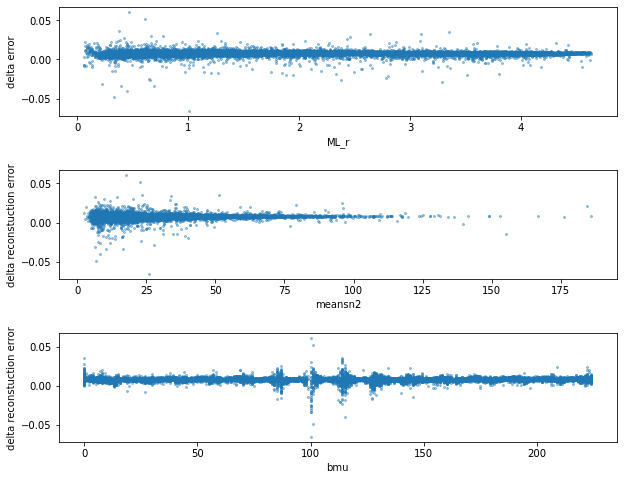

In [10]:
''' Spread out by a couple variables'''

ATTR='ML_r'
fig,ax=plt.subplots(3,1,figsize=(10,8))
ax[0].scatter(Ymin[ATTR],np.average(delta,axis=1),s=4,alpha=0.4)
ax[0].set_xlabel(ATTR)
ax[0].set_ylabel('delta error')

ATTR='meansn2'
ax[1].scatter(Ymin[ATTR],np.average(delta,axis=1),s=4,alpha=0.4)
ax[1].set_xlabel(ATTR)
ax[1].set_ylabel('delta reconstuction error')

ATTR='bmu'
ax[2].scatter(Ymin[ATTR],np.average(delta,axis=1),s=4,alpha=0.4)
ax[2].set_xlabel(ATTR)
ax[2].set_ylabel('delta reconstuction error')
plt.subplots_adjust(wspace=0.5,hspace=0.5)

Text(0.5, 1.0, 'AE reconstruction error')

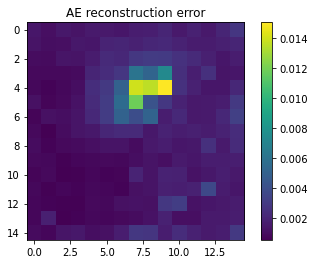

In [58]:
''' bmu reshaped'''

dumb_temp=np.zeros(225)
for i in range(225):
    mask=(Ymin['bmu']==i)
    temp=delta[mask].mean(axis=1)
    dumb_temp[i]=temp.std()

plt.imshow(dumb_temp.reshape(15,15))
plt.colorbar()
plt.title('AE reconstruction error')